<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [11]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])
print("imported")

imported


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
print("imported")

imported


#### Read the dataset in the csv file from the URL


In [13]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())
print("imp")

imp


In [14]:
df=pd.read_csv(boston_url)
print("imp")

imp


#### Add your code below following the instructions given in the course to complete the peer graded assignment


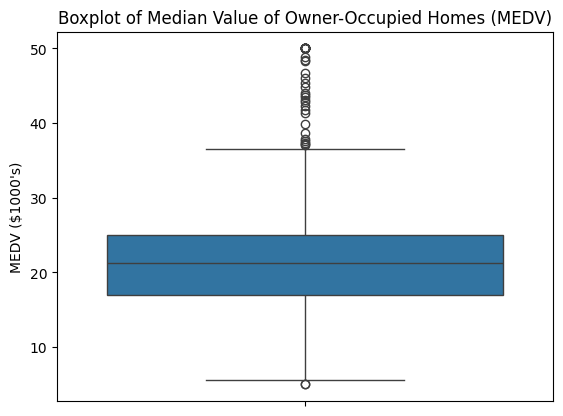

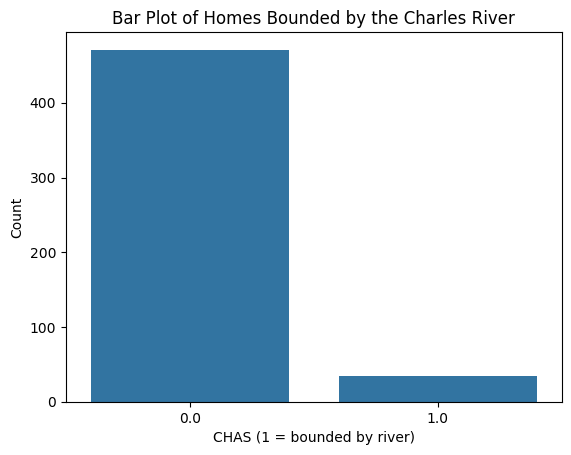

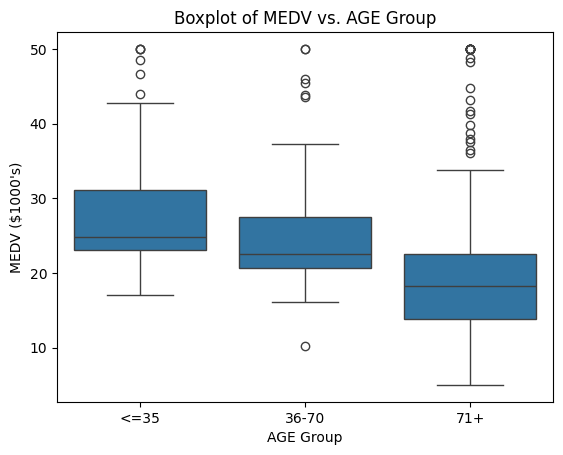

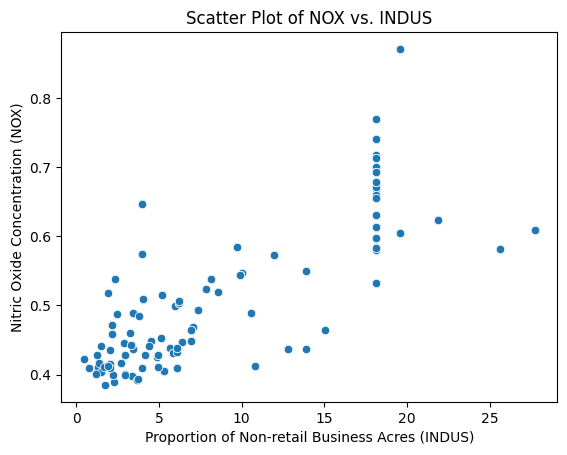

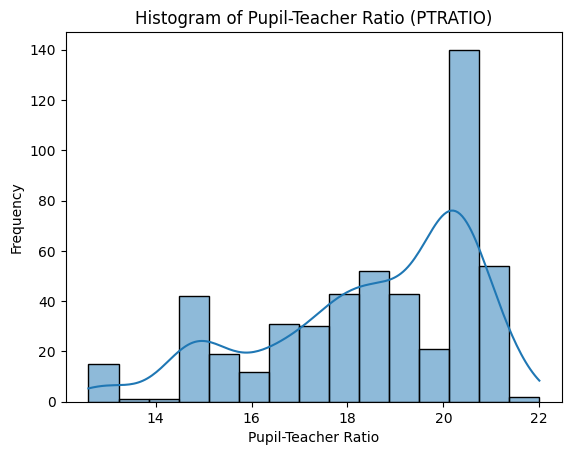

T-Test: CHAS vs MEDV
T-Statistic = 3.996437466090509
P-Value = 7.390623170519905e-05
Conclusion: Reject H0 - Significant difference in MEDV for CHAS

ANOVA: MEDV across AGE groups
                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


<ipython-input-15-a986f807a095>:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_result["PR(>F)"][0] < alpha:


Conclusion: Reject H0 - Significant difference in MEDV across AGE groups

Pearson Correlation: NOX vs INDUS
Correlation Coefficient = 0.7636514469209192
P-Value = 7.913361061210442e-98
Conclusion: Reject H0 - Significant correlation between NOX and INDUS

Regression: DIS impact on MEDV
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        17:43:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Co

<ipython-input-15-a986f807a095>:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.pvalues[1] < alpha:


Conclusion: Reject H0 - DIS has a significant effect on MEDV



In [15]:

# -------------------- TASK 2: DESCRIPTIVE STATISTICS & VISUALIZATIONS --------------------

# 1. Boxplot for MEDV
sns.boxplot(y=df["MEDV"])
plt.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
plt.ylabel("MEDV ($1000's)")
plt.show()

# 2. Bar plot for CHAS
sns.countplot(x="CHAS", data=df)
plt.title("Bar Plot of Homes Bounded by the Charles River")
plt.xlabel("CHAS (1 = bounded by river)")
plt.ylabel("Count")
plt.show()

# 3. Boxplot for MEDV vs. AGE group
df["AGE_group"] = pd.cut(df["AGE"], bins=[0, 35, 70, 100], labels=["<=35", "36-70", "71+"])
sns.boxplot(x="AGE_group", y="MEDV", data=df)
plt.title("Boxplot of MEDV vs. AGE Group")
plt.xlabel("AGE Group")
plt.ylabel("MEDV ($1000's)")
plt.show()

# 4. Scatter plot for NOX vs. INDUS
sns.scatterplot(x="INDUS", y="NOX", data=df)
plt.title("Scatter Plot of NOX vs. INDUS")
plt.xlabel("Proportion of Non-retail Business Acres (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.show()

# 5. Histogram for PTRATIO
sns.histplot(df["PTRATIO"], bins=15, kde=True)
plt.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

# -------------------- TASK 3: STATISTICAL ANALYSIS --------------------

alpha = 0.05

# 1. T-Test: Is there a difference in MEDV based on CHAS?
group1 = df[df["CHAS"] == 1]["MEDV"]
group0 = df[df["CHAS"] == 0]["MEDV"]
t_stat, p_val = stats.ttest_ind(group1, group0)
print("T-Test: CHAS vs MEDV")
print("T-Statistic =", t_stat)
print("P-Value =", p_val)
if p_val < alpha:
    print("Conclusion: Reject H0 - Significant difference in MEDV for CHAS\n")
else:
    print("Conclusion: Fail to reject H0 - No significant difference in MEDV for CHAS\n")

# 2. ANOVA: Difference in MEDV across AGE groups
model = ols('MEDV ~ C(AGE_group)', data=df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print("ANOVA: MEDV across AGE groups")
print(anova_result)
if anova_result["PR(>F)"][0] < alpha:
    print("Conclusion: Reject H0 - Significant difference in MEDV across AGE groups\n")
else:
    print("Conclusion: Fail to reject H0 - No significant difference in MEDV across AGE groups\n")

# 3. Pearson Correlation: NOX vs INDUS
corr, p_val = stats.pearsonr(df["NOX"], df["INDUS"])
print("Pearson Correlation: NOX vs INDUS")
print("Correlation Coefficient =", corr)
print("P-Value =", p_val)
if p_val < alpha:
    print("Conclusion: Reject H0 - Significant correlation between NOX and INDUS\n")
else:
    print("Conclusion: Fail to reject H0 - No significant correlation between NOX and INDUS\n")

# 4. Regression: DIS vs MEDV
X = sm.add_constant(df["DIS"])
model = sm.OLS(df["MEDV"], X).fit()
print("Regression: DIS impact on MEDV")
print(model.summary())
if model.pvalues[1] < alpha:
    print("Conclusion: Reject H0 - DIS has a significant effect on MEDV\n")
else:
    print("Conclusion: Fail to reject H0 - DIS has no significant effect on MEDV\n")
